In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 4. Generate a simulated two-class data set with 100 observations and two features in which there is a 
# visible but non-linear separation between the two classes. Show that in this setting, a support vector 
# machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support 
# vector classifier on the training data. Which technique performs best on the test data? Make plots and report 
# training and test error rates in order to back up your assertions.


np.random.seed(1)
X = np.random.randn(100, 2)
data = pd.DataFrame(X, columns = ['X1', 'X2'])
y = 1*(data['X1']**4 - data['X2'] > 1) # select classes such that there is a non-linear relationship
data['y'] = y

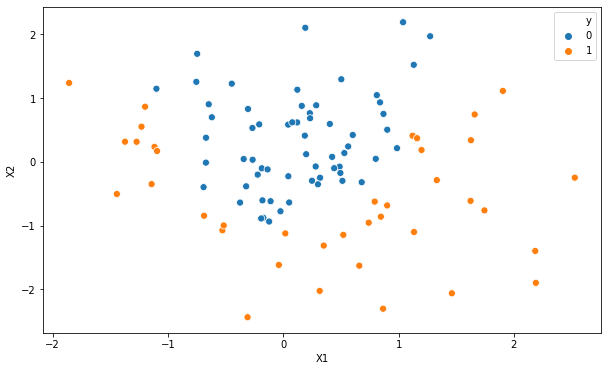

In [3]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'X1', y = 'X2', hue = 'y', data = data, s = 50)

In [4]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(data.drop('y', axis = 1), data['y'], test_size = 0.5, random_state = 1)
print(X_train.shape, X_test.shape)

(50, 2) (50, 2)


In [5]:
# Support Vector Classifier

svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)
print(f'Training score is: {svc.score(X_train, y_train)}')
print(f'Testing score is: {svc.score(X_test, y_test)}')

Training score is: 0.76
Testing score is: 0.78


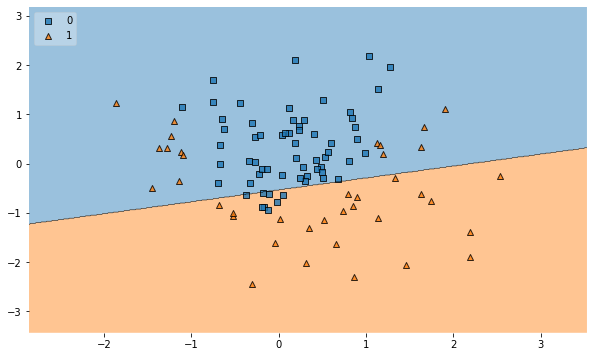

In [6]:
plt.figure(figsize = (10, 6))
plot_decision_regions(np.array(data.drop('y', axis = 1)), np.array(data['y']), clf = svc, legend = 2)

In [7]:
# Using SVM with a non-linear kernel
search = GridSearchCV(SVC(), param_grid = {'kernel': ['poly', 'rbf']}, cv = 5)
search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kernel': ['poly', 'rbf']}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [8]:
search.best_params_

{'kernel': 'rbf'}

In [9]:
best_model = search.best_estimator_
best_model


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
print(f'Training score : {best_model.score(X_train, y_train)}')
print(f'Test score: {best_model.score(X_test, y_test)}')

Training score : 1.0
Test score: 0.92


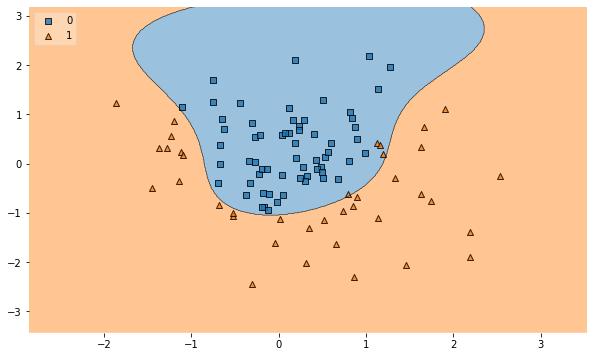

In [11]:
plt.figure(figsize = (10, 6))
plot_decision_regions(np.array(data.drop('y', axis = 1)), np.array(data['y']), clf = best_model, legend = 2)

In [12]:
# 5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a 
# non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by 
# performing logistic regression using non-linear transformations of the features.

# (a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a 
# quadratic decision boundary between them. For instance, you can do this as follows:

np.random.seed(1)
X1 = np.random.uniform(0, 1, 500) - 0.5
X2 = np.random.uniform(0, 1, 500) - 0.5

y = 1*(X1**2 - X2**2 > 0)

data = pd.DataFrame({'X1': X1, 'X2': X2, 'y':y})

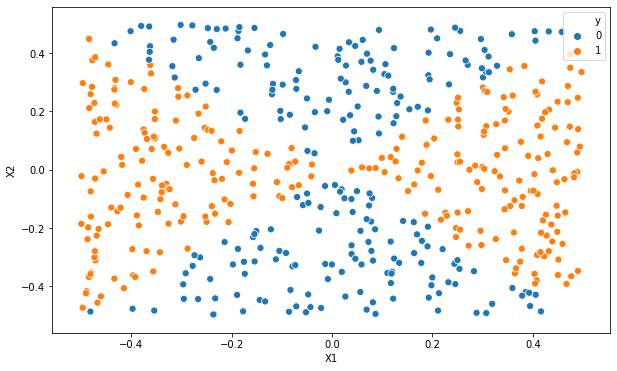

In [13]:
# (b) Plot the observations, colored according to their class labels.  Your plot should display X1 on the x-axis, 
# and X2 on the yaxis.

plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'X1', y = 'X2', hue = 'y', data = data, s = 50)

In [14]:
# (c) Fit a logistic regression model to the data, using X1 and X2 as predictors.

X_train, X_test, y_train, y_test = train_test_split(data.drop('y', axis = 1), data['y'], test_size = 0.5, random_state = 1)
                                                    

In [15]:
lr = LogisticRegression().fit(X_train, y_train)

(-0.5, 1.0)

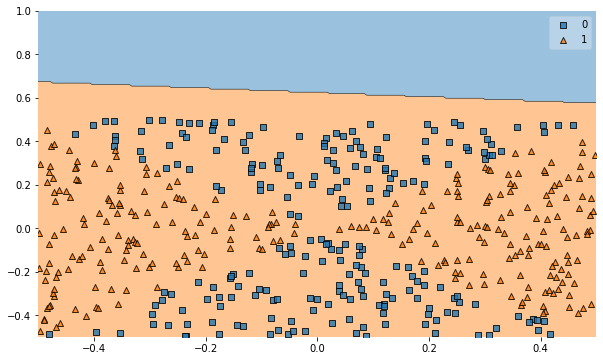

In [16]:
plt.figure(figsize = (10, 6))
plot_decision_regions(np.array(data.drop('y', axis = 1)), np.array(data['y']), clf = lr)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 1.0)

In [17]:
print('Training score is ',lr.score(X_train,y_train))
print('Testing Score is ',lr.score(X_test,y_test))

Training score is  0.52
Testing Score is  0.56


In [18]:
# (e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors 
# (e.g. X2 1 , X1×X2, log(X2), and so forth).

data['X1^2'] = data['X1']**2
data['X2^2'] = data['X2']**2

data['X1X2'] = data['X1']*data['X2']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('y', axis = 1), data['y'], test_size = 0.5, random_state = 1)

lr = LogisticRegression().fit(X_train, y_train)

print(f'Training score is : {lr.score(X_train, y_train)}')
print(f'Test score is : {lr.score(X_test, y_test)}')

Training score is : 0.932
Test score is : 0.924


In [20]:
preds = lr.predict(data.drop('y',axis=1))
data['preds'] = preds

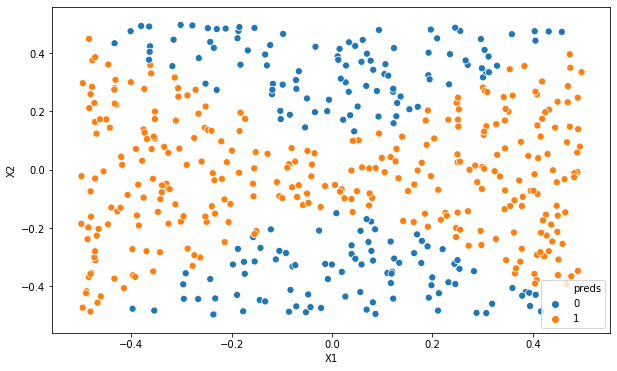

In [21]:
# I couldn't figure out how to draw the dicision boundary here, but i plotted the predicted values, and we can 
# see that these values are much much similar to the data we craeted. 

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'X1',y = 'X2',hue = 'preds',data =data,s = 50)

In [22]:
# (g) Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for 
# each training observation. Plot the observations, colored according to the predicted class labels.

# dropping additional features
data.drop(['X1^2','X2^2','X1X2','preds'],axis = 1,inplace  = True)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('y',axis=1),data['y'],test_size = 0.5,random_state = 1)


In [24]:
svc = SVC(kernel = 'linear').fit(X_train, y_train)

In [25]:
print(f'Training score is : {svc.score(X_train, y_train)}')
print(f'Test score is : {svc.score(X_test, y_test)}')

Training score is : 0.52
Test score is : 0.56


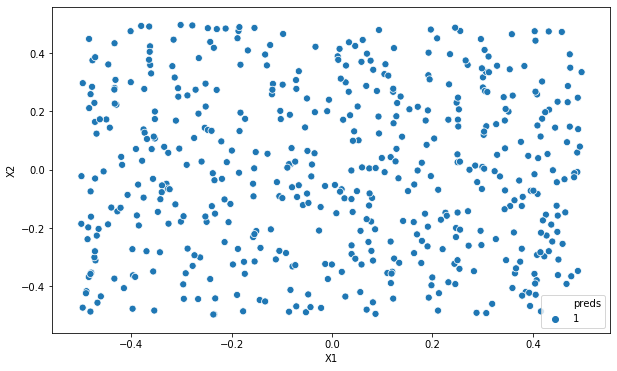

In [26]:
preds = svc.predict(data.drop('y', axis = 1))
data['preds'] = preds

plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'X1', y = 'X2', hue = 'preds', data = data, s = 50)

In [28]:
# (h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. 
# Plot the observations, colored according to the predicted class labels.

data.drop('preds', axis = 1, inplace = True)

In [29]:
# lets use grid search to select the optimal hyperparameters
search = GridSearchCV(SVC(kernel = 'rbf'), param_grid = {'C': [0.1, 1, 10, 100, 1000]}, cv = 10)
search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [30]:
search.best_params_

{'C': 10}

In [32]:
best_model = search.best_estimator_
best_model

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
print(f'Training score is : {best_model.score(X_train, y_train)}')
print(f'Test score is : {best_model.score(X_test, y_test)}')

Training score is : 0.988
Test score is : 0.972


(-0.5, 0.5)

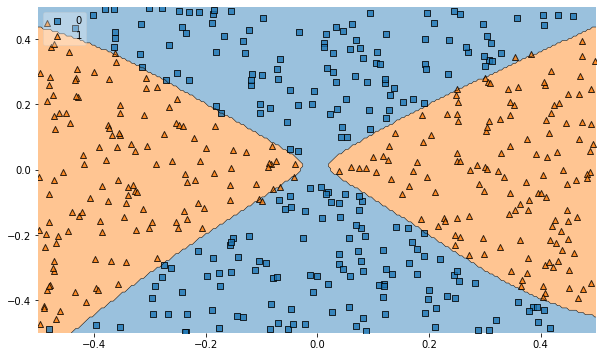

In [35]:
plt.figure(figsize = (10, 6))
plot_decision_regions(np.array(data.drop('y', axis = 1)), np.array(data['y']), clf = best_model, legend = 2)
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)

In [36]:
# (i) Comment on your results.
# We can see that logistic regression with 2 features, and svc both performed very poorly. We got good results 
# when we tried logistic regression while adding more features, but we got the best result from using svm with 
# non linear kernel

In [37]:
# 6. At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, 
# a support vector classifier with a small value of cost that misclassifies a couple of training observations 
# may perform better on test data than one with a huge value of cost that does not misclassify any training 
# observations. You will now investigate this claim.

# (a) Generate two-class data with p = 2 in such a way that the classes are just barely linearly separable.

np.random.seed(1)
X = np.random.normal(size = (200, 2))
y = 1*(X[:, 0] + X[:, 1] > 0)

In [38]:
df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'y': y})
df.head()

,X1,X2,y
0,1.624345,-0.611756,1
1,-0.528172,-1.072969,0
2,0.865408,-2.301539,0
3,1.744812,-0.761207,1
4,0.319039,-0.249370,1


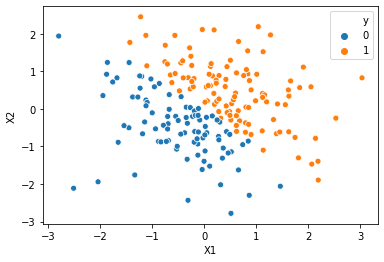

In [39]:
sns.scatterplot(x = 'X1', y = 'X2', hue = 'y', data = df)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis = 1), df['y'], test_size = 0.5, random_state = 1)
X_train.shape, X_test.shape

((100, 2), (100, 2))

In [42]:
# (b) Compute the cross-validation error rates for support vector classifiers with a range of cost values. 
# How many training errors are misclassified for each value of cost considered, and how does this relate to 
# the cross-validation errors obtained?

training_scores_dict = {}
cross_val_scores_dict = {}

cost_values = np.logspace(-2, 6, 20)

for cost in cost_values:
    svc = SVC(kernel = 'linear', C = cost)
    svc.fit(X_train, y_train)
    training_scores_dict[cost] = svc.score(X_train, y_train)
    cross_val_scores_dict[cost] = np.mean(cross_val_score(svc, X_train, y_train, cv = 10))

Text(0, 0.5, 'Accuracy')

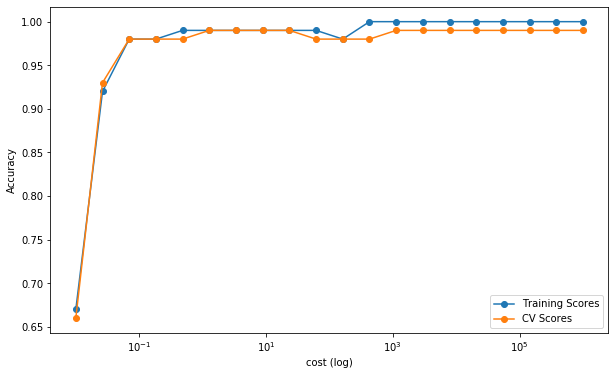

In [44]:
plt.figure(figsize = (10, 6))
plt.plot(list(training_scores_dict.keys()), list(training_scores_dict.values()), marker = 'o', label = 'Training Scores')
plt.plot(list(cross_val_scores_dict.keys()), list(cross_val_scores_dict.values()), marker = 'o', label = 'CV Scores')
plt.legend()
plt.xscale('log')
plt.xlabel('cost (log)')
plt.ylabel('Accuracy')

In [45]:
# (c) Generate an appropriate test data set, and compute the test errors corresponding to each of the values 
# of cost considered. Which value of cost leads to the fewest test errors, and how does this compare to the 
# values of cost that yield the fewest training errors and the fewest cross-validation errors?

test_scores_dict = {}
cost_values = np.logspace(-2, 6, 20)

for cost in cost_values:
    svc = SVC(kernel = 'linear', C = cost).fit(X_train, y_train)
    test_scores_dict[cost] = svc.score(X_test, y_test)

Text(0, 0.5, 'Accuracy')

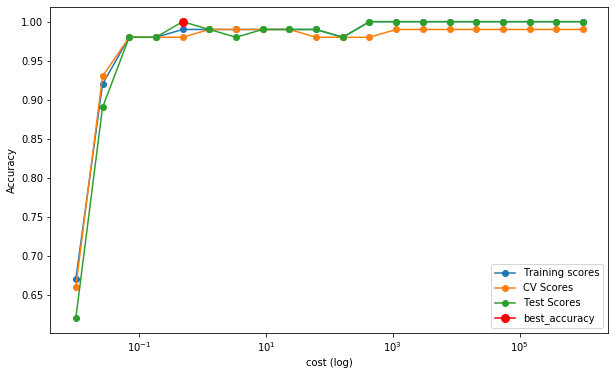

In [46]:
plt.figure(figsize = (10,6))
plt.plot(list(training_scores_dict.keys()),list(training_scores_dict.values()),marker = 'o',label = 'Training scores')
plt.plot(list(cross_val_scores_dict.keys()),list(cross_val_scores_dict.values()),marker = 'o',label = 'CV Scores')
plt.plot(list(test_scores_dict.keys()),list(test_scores_dict.values()),marker = 'o',label = 'Test Scores')

plt.plot(max(test_scores_dict, key = test_scores_dict.get), max(list(test_scores_dict.values())), marker = 'o', markersize = 8, c = 'r', label = 'best_accuracy')

plt.legend()
plt.xscale('log')
plt.xlabel('cost (log)')
plt.ylabel('Accuracy')


In [47]:
print('The best test accuracy is when cost  = ',max(test_scores_dict, key=test_scores_dict.get))

The best test accuracy is when cost  =  0.4832930238571752


In [48]:
### (d) Discuss your results

# The training accuracy always increasess with increase in the value of C, so, we cant' use that to decide 
# which is the best value of C for this data, so, we will analyze the test error, we can see that the test 
# error is the highest at a point and then becomes steady, so we will use that value of C for our final model

In [49]:
# 7. In this problem, you will use support vector approaches in order to predict whether a given car gets high 
# or low gas mileage based on the Auto data set.

data = pd.read_csv('/home/abhishek/Desktop/ISLR-Applied-Exercises-in-Python/data/Auto.csv')
print(data.shape)
data.head()

(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [50]:
data['horsepower'] = data['horsepower'].replace('?',np.nan)
data.dropna(inplace = True)
data['horsepower'] = data['horsepower'].astype('int')

In [51]:
# (a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars 
# with gas mileage below the median.

data['mpg_binary'] = np.where(data['mpg'] > np.median(data['mpg']), 1, 0)
X = data.drop(['mpg', 'name', 'mpg_binary'], axis = 1)
y = data['mpg_binary']

In [54]:
# (b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a 
# car gets high or low gas mileage. Report the cross-validation errors associated with different values of 
# this parameter. Comment on your results.

from tqdm import tqdm
svc_scores_dict = {}
cost_values = np.logspace(-2, 6, 10)

for cost in tqdm(cost_values):
    svc = SVC(kernel = 'linear', C = cost).fit(X, y)
    svc_scores_dict[cost] = np.mean(cross_val_score(svc, X, y, cv = 10))

100%|██████████| 10/10 [03:30<00:00, 21.01s/it]


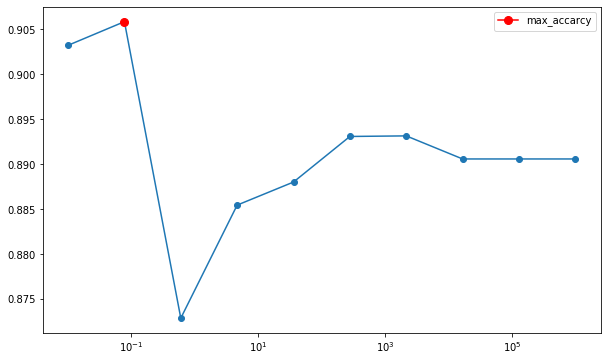

In [56]:
plt.figure(figsize = (10, 6))
plt.plot(list(svc_scores_dict.keys()), list(svc_scores_dict.values()), marker = 'o')
plt.plot(max(svc_scores_dict, key = svc_scores_dict.get), max(list(svc_scores_dict.values())), marker = 'o', markersize = 8, c = 'r', label = 'max_accarcy')
plt.legend()
plt.xscale('log')


In [57]:
# (c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of 
# gamma and degree and cost. Comment on your results.

from tqdm import tqdm
rbf_scores_dict = {}
poly_scores_dict = {}

cost_values = np.logspace(-2,6,20)

for cost in tqdm(cost_values):
    rbf = SVC(kernel = 'rbf',C = cost)
    rbf.fit(X,y)
    rbf_scores_dict[cost] = np.mean(cross_val_score(rbf,X,y,cv=10))
    
    poly = SVC(kernel = 'poly',C = cost)
    poly.fit(X,y)
    poly_scores_dict[cost] = np.mean(cross_val_score(poly,X,y,cv=10))
    

100%|██████████| 20/20 [02:23<00:00,  7.19s/it]


No handles with labels found to put in legend.


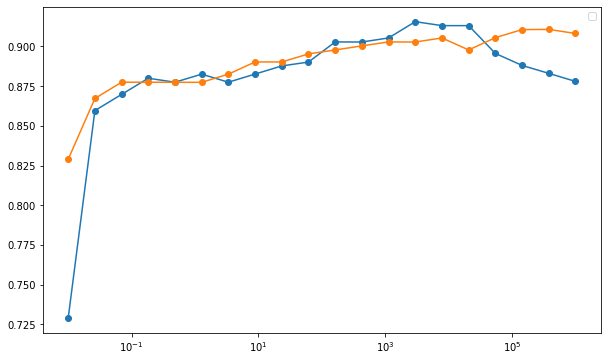

In [58]:
plt.figure(figsize = (10,6))
plt.plot(list(rbf_scores_dict.keys()),list(rbf_scores_dict.values()),marker = 'o')
plt.plot(list(poly_scores_dict.keys()),list(poly_scores_dict.values()),marker = 'o')
plt.legend()
plt.xscale('log')

In [61]:
# 8. This problem involves the OJ data set which is part of the ISLR package.

data = pd.read_csv('/home/abhishek/Desktop/ISLR-Applied-Exercises-in-Python/data/OJ.csv')
print(data.shape)
data.head()

(1070, 18)


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [62]:
#encode the categorical variables
data['Purchase'] = data['Purchase'].map({'CH':1,'MM':0})
data['Store7'] = data['Store7'].map({'Yes':1,'No':0})

In [63]:
# (a) Create a training set containing a random sample of 800 observations, and a test set containing the 
# remaining observations.
X_train,X_test,y_train,y_test = train_test_split(data.drop('Purchase',axis=1),data['Purchase'],train_size = 800,random_state = 1)
X_train.shape, X_test.shape


((800, 17), (270, 17))

In [64]:
# (b) Fit a support vector classifier to the training data using cost=0.01, with Purchase as the response and 
# the other variables as predictors. Use the summary() function to produce summary statistics, and describe 
# the results obtained

model = SVC(kernel = 'linear', C = 0.001)
model.fit(X_train, y_train)

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
print('Number of support vectors for each class are ',model.n_support_)

Number of support vectors for each class are  [304 307]


In [66]:
# (c) What are the training and test error rates?

print('Training Accuracy is ',model.score(X_train,y_train))
print('Test Accuracy is ',model.score(X_test,y_test))

Training Accuracy is  0.62
Test Accuracy is  0.5814814814814815


In [ ]:
# (d) Use the tune() function to select an optimal cost. Consider values in the range 0.01 to 10.

search = GridSearchCV(SVC(kernel = 'linear'),param_grid={'C':np.logspace(-2,2,5)})
search.fit(X_train,y_train)

In [ ]:
np.logspace(-2, 2, 5)

In [ ]:
search.best_params_

In [ ]:
# (e) Compute the training and test error rates using this new value for cost.

best_model = search.best_estimator_
print('Training Accuracy ',best_model.score(X_train,y_train))
print('Test Accuracy 'best_model.score(X_test,y_test))

In [ ]:
# (f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value 
# for gamma.

model = SVC(kernel = 'rbf',C = 0.01)
model.fit(X_train,y_train)

print('Number of support vectors for each class are ',model.n_support_)


print('Training Accuracy for starting model ',model.score(X_train,y_train))
print('Test Accuracy for starting model ',model.score(X_test,y_test))


search = GridSearchCV(SVC(kernel = 'rbf'),param_grid={'C':np.logspace(-2,2,5)})
search.fit(X_train,y_train)

print('Best value of C is ',search.best_params)

best_model = search.best_estimator_

print('Training Accuracy radial',best_model.score(X_train,y_train))
print('Test Accuracy radial'best_model.score(X_test,y_test))

In [ ]:
# (g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree=2.

model = SVC(kernel = 'poly',degree = 2,C = 0.01)
model.fit(X_train,y_train)

print('Number of support vectors for each class are ',model.n_support_)


print('Training Accuracy for starting model ',model.score(X_train,y_train))
print('Test Accuracy for starting model ',model.score(X_test,y_test))


search = GridSearchCV(SVC(kernel = 'poly',degree = 2),param_grid={'C':np.logspace(-2,2,5)})
search.fit(X_train,y_train)

print('Best value of C is ',search.best_params)

best_model = search.best_estimator_

print('Training Accuracy radial',best_model.score(X_train,y_train))
print('Test Accuracy radial'best_model.score(X_test,y_test))

In [ ]:
# (h) Overall, which approach seems to give the best results on this data?

# CPU couldn't compute